# TASK - 1 : Merge Data 

In [3]:
import pandas as pd
import glob
import os

# Path to your folder containing subject CSVs
folder_path = 'C:/Users/hp/Downloads/PPG_SUB/'
csv_files = glob.glob(folder_path + '*.csv')

# Load the extra columns with Subject_ID as key
extra_df = pd.read_csv('master_dataset.csv')  # Contains: Subject_ID, A, B

# Loop through each file in the folder
for file_path in csv_files:
    df = pd.read_csv(file_path)

    # Get Subject_ID from current file
    subject_id = df['Subject_ID'].iloc[0]

    # Get the matching row from extra_df
    matching_row = extra_df[extra_df['Subject_ID'] == subject_id]

    # If match found, add A & B columns
    if not matching_row.empty:
        for col in ['HR', 'HRV']:  # Columns you want to add
            df[col] = matching_row.iloc[0][col]
    
    else:
        print(f"⚠️ Subject_ID {subject_id} not found in extra_columns.csv")

    # Save to new folder
    filename = os.path.basename(file_path)
    output_path = f'C:/Users/hp/Downloads/Updated_PPG_SUB/{filename}'
    df.to_csv(output_path, index=False)
    print(f"✅ Saved: {output_path}")

✅ Saved: C:/Users/hp/Downloads/Updated_PPG_SUB/subject_1.csv
✅ Saved: C:/Users/hp/Downloads/Updated_PPG_SUB/subject_10.csv
✅ Saved: C:/Users/hp/Downloads/Updated_PPG_SUB/subject_11.csv
✅ Saved: C:/Users/hp/Downloads/Updated_PPG_SUB/subject_12.csv
✅ Saved: C:/Users/hp/Downloads/Updated_PPG_SUB/subject_13.csv
✅ Saved: C:/Users/hp/Downloads/Updated_PPG_SUB/subject_14.csv
✅ Saved: C:/Users/hp/Downloads/Updated_PPG_SUB/subject_15.csv
✅ Saved: C:/Users/hp/Downloads/Updated_PPG_SUB/subject_16.csv
✅ Saved: C:/Users/hp/Downloads/Updated_PPG_SUB/subject_17.csv
✅ Saved: C:/Users/hp/Downloads/Updated_PPG_SUB/subject_18.csv
✅ Saved: C:/Users/hp/Downloads/Updated_PPG_SUB/subject_19.csv
✅ Saved: C:/Users/hp/Downloads/Updated_PPG_SUB/subject_2.csv
✅ Saved: C:/Users/hp/Downloads/Updated_PPG_SUB/subject_20.csv
✅ Saved: C:/Users/hp/Downloads/Updated_PPG_SUB/subject_3.csv
✅ Saved: C:/Users/hp/Downloads/Updated_PPG_SUB/subject_4.csv
✅ Saved: C:/Users/hp/Downloads/Updated_PPG_SUB/subject_5.csv
✅ Saved: C:/U

# TASK - 2 : Visualize Merged PPG Data

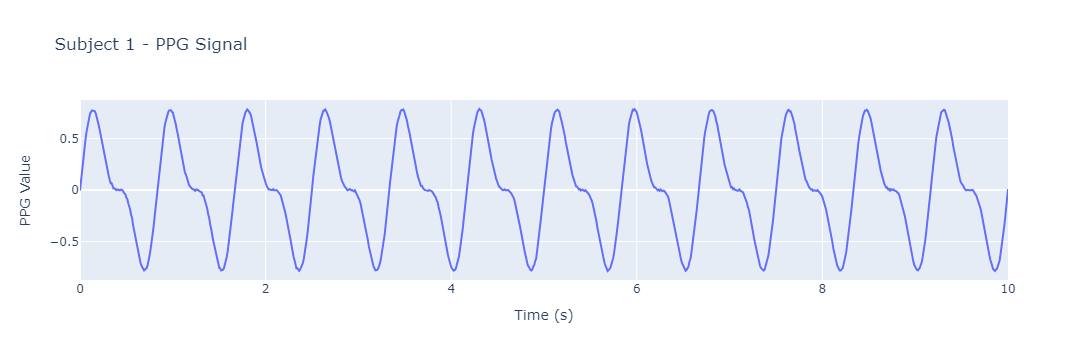

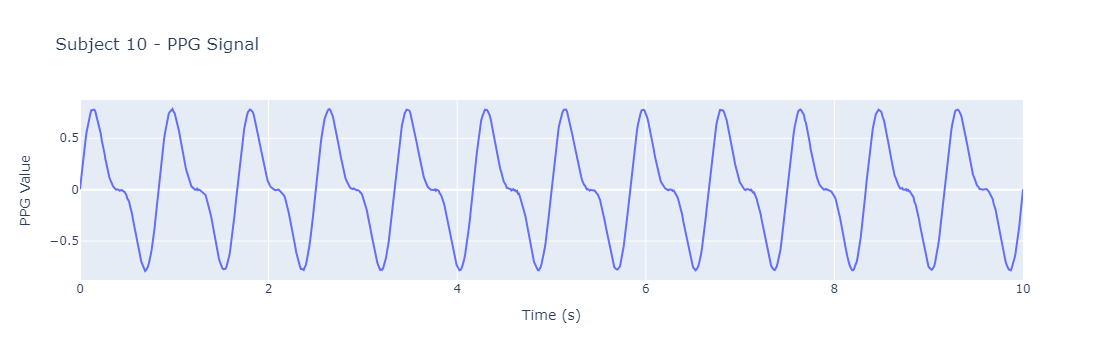

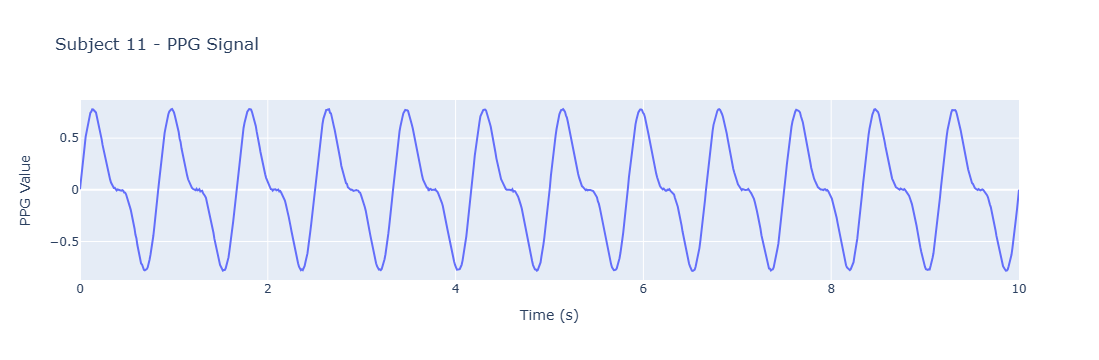

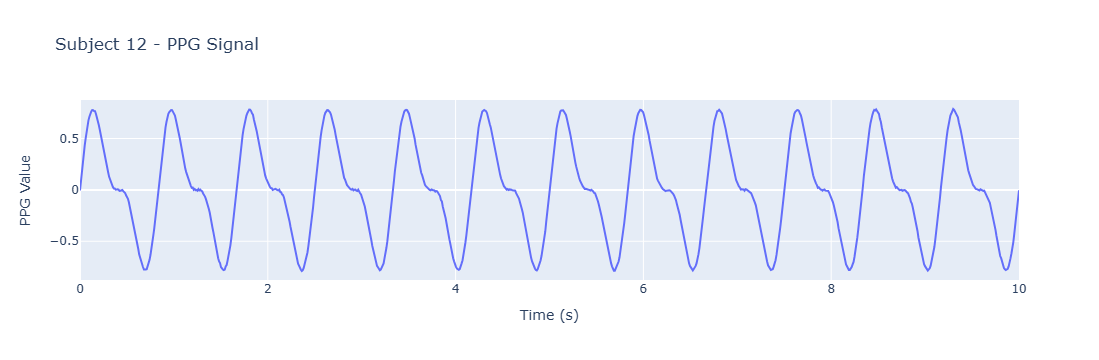

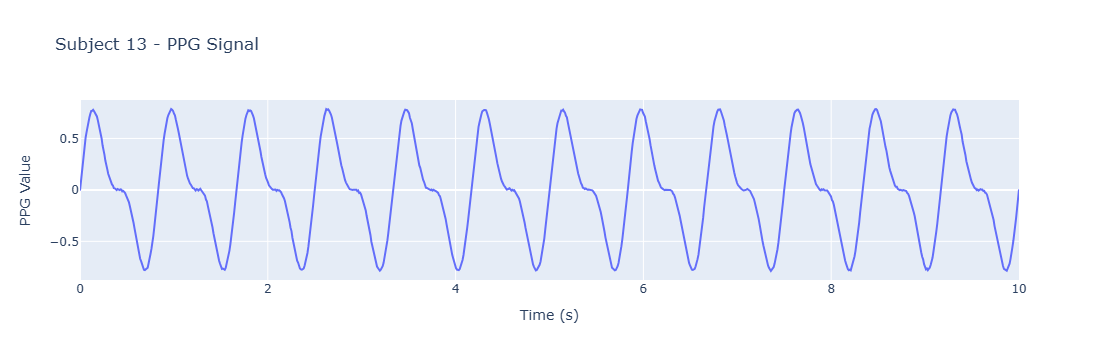

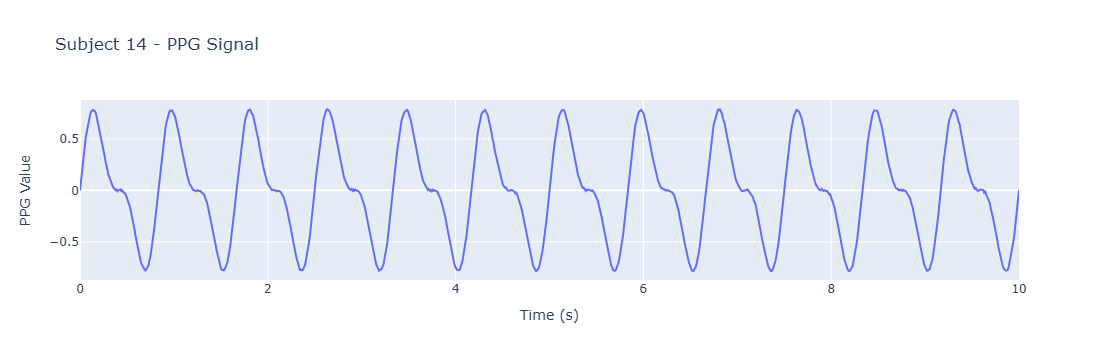

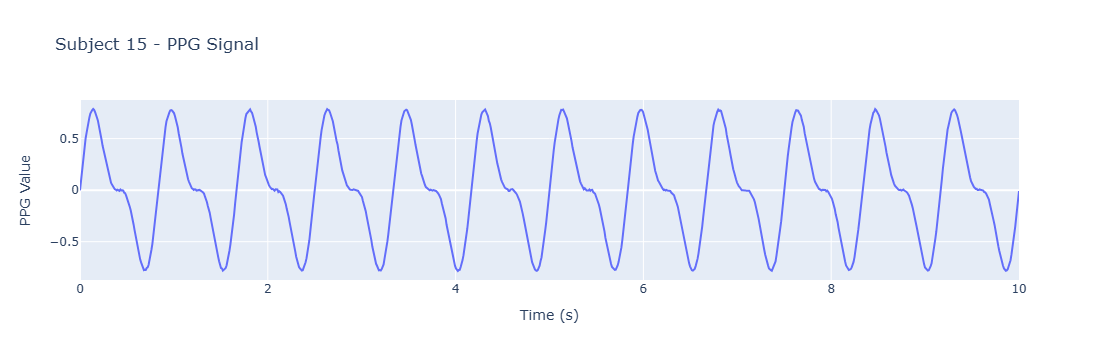

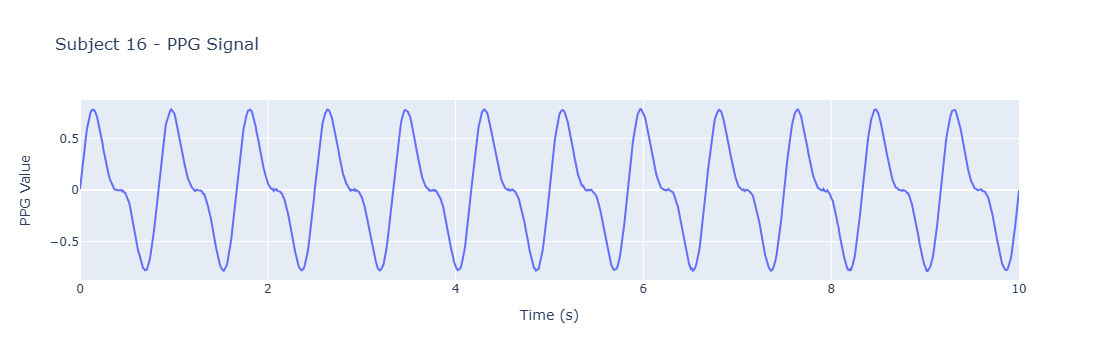

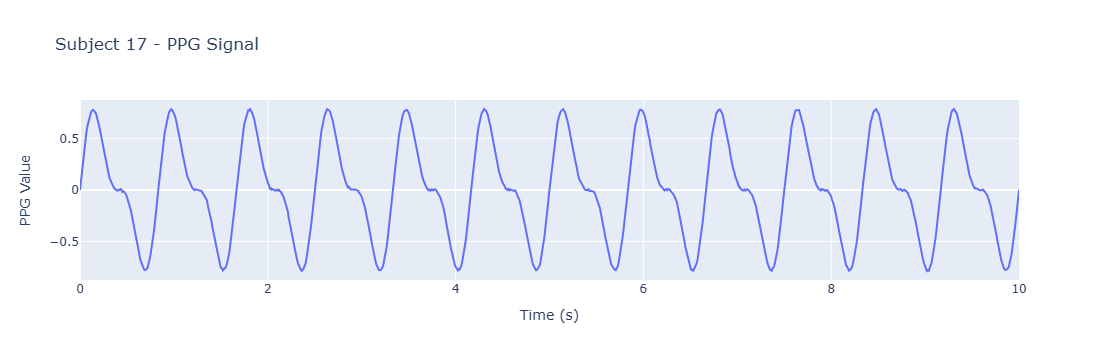

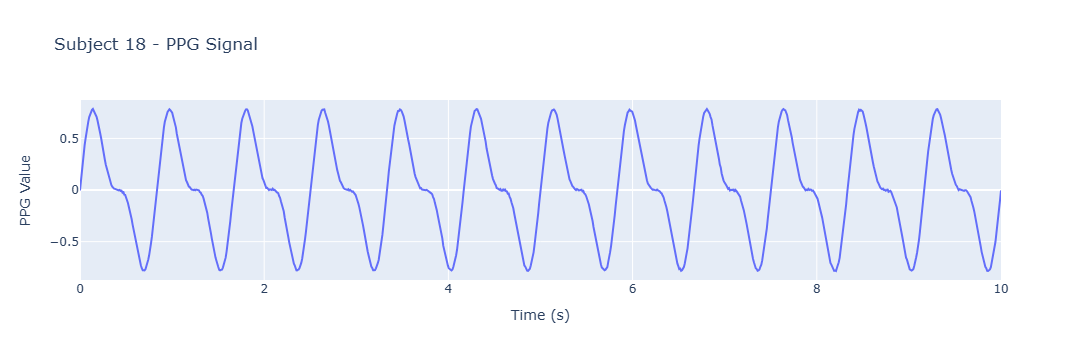

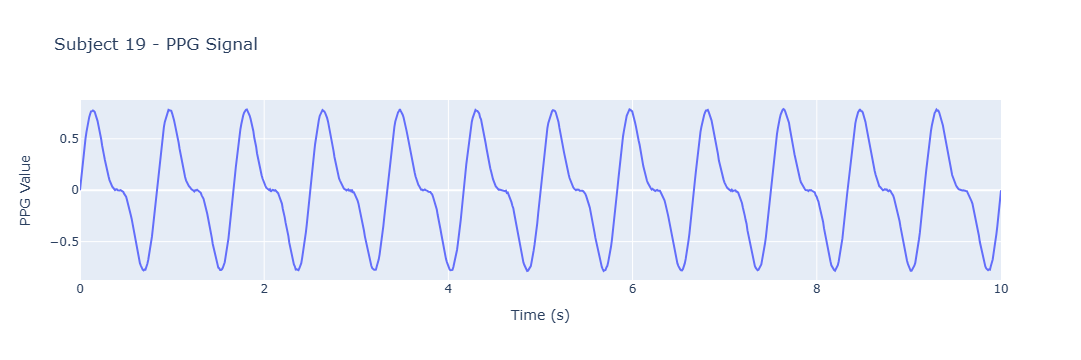

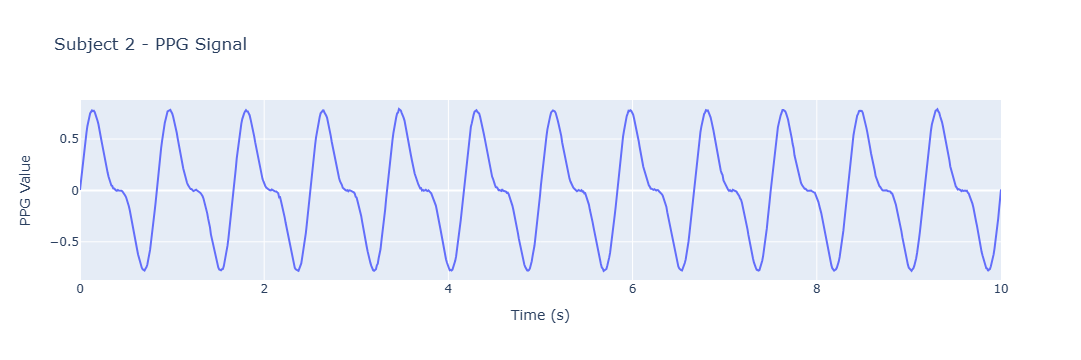

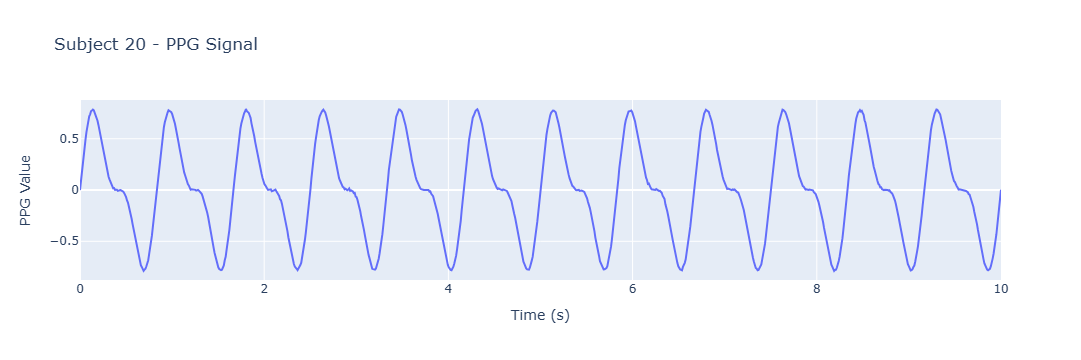

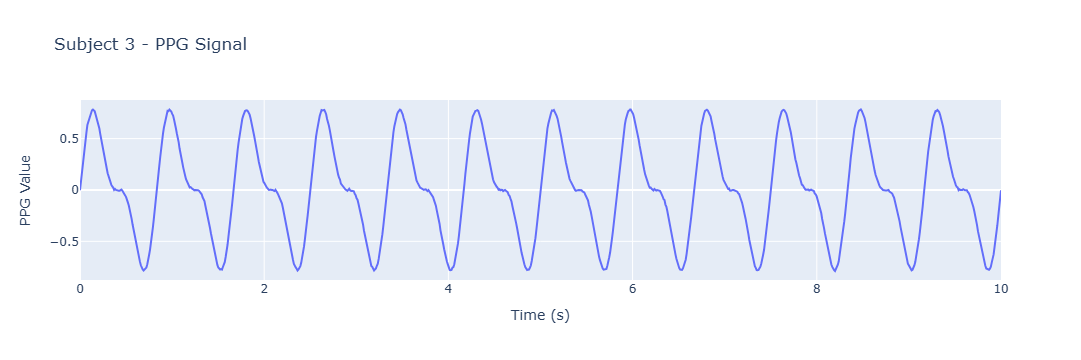

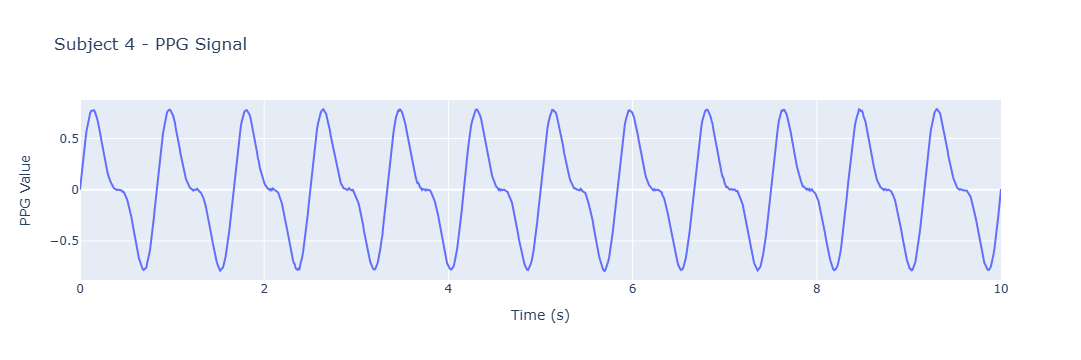

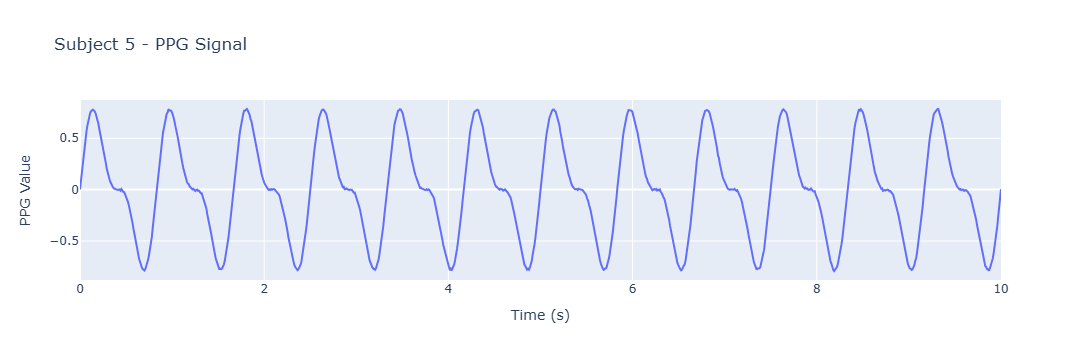

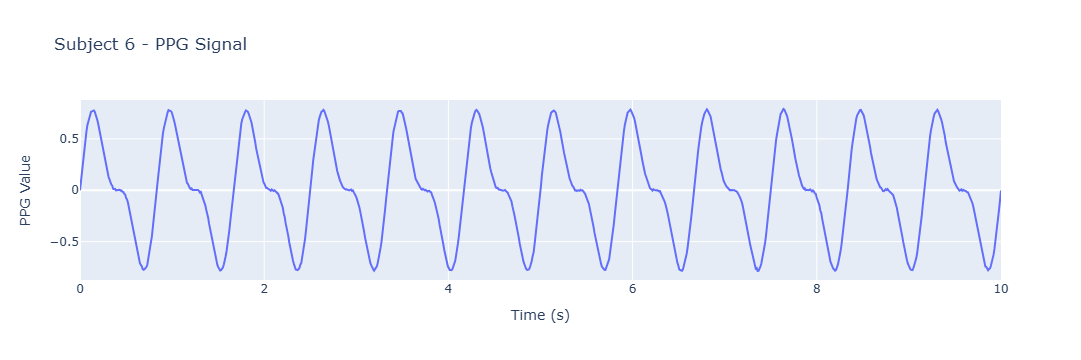

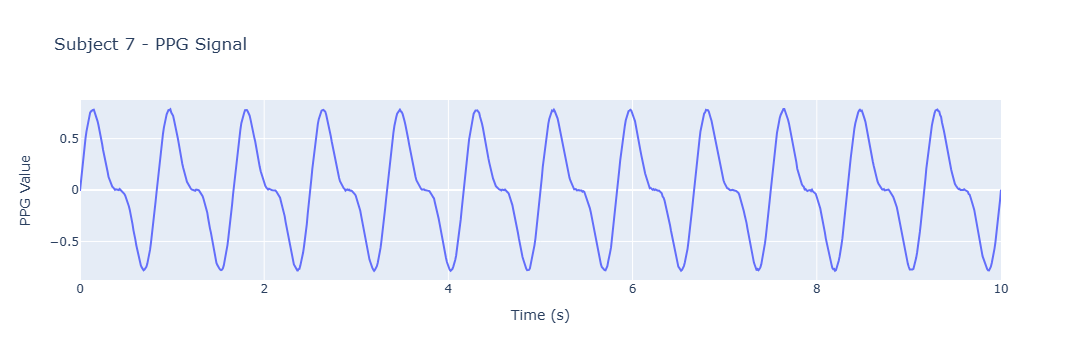

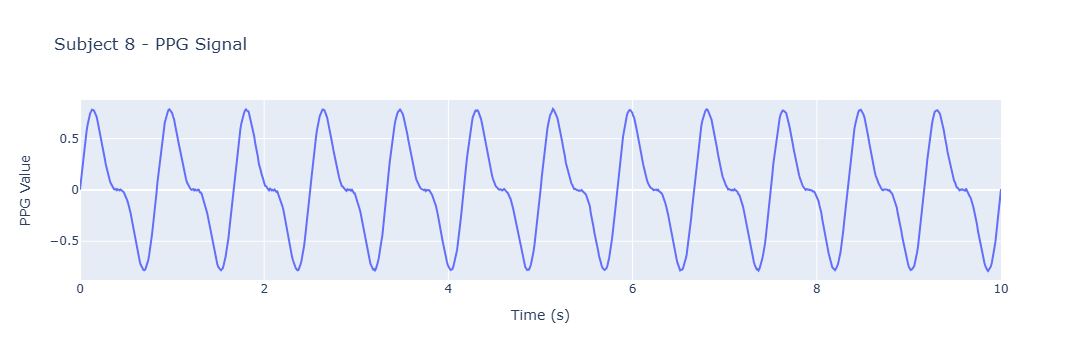

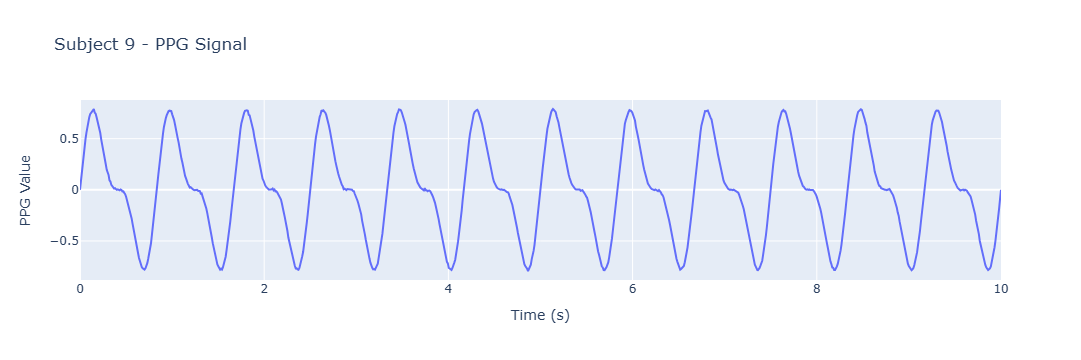

In [5]:
import pandas as pd
import plotly.express as px
import glob
import os

# Path to folder with updated merged CSVs
merged_folder = 'C:/Users/hp/Downloads/Updated_PPG_SUB/'
csv_files = glob.glob(merged_folder + '*.csv')

# Loop and plot each
for file_path in csv_files:
    df = pd.read_csv(file_path)

    # Get Subject_ID (assumes it's the same throughout the file)
    subject_id = df['Subject_ID'].iloc[0]

    # Create interactive line plot
    fig = px.line(df, x='Time', y='PPG',
                  title=f"Subject {subject_id} - PPG Signal",
                  labels={'Time': 'Time (s)', 'PPG': 'PPG Value'})

    fig.show()


# TASK -3 : Combine and Split Data

In [10]:
import pandas as pd
import glob
from sklearn.model_selection import train_test_split

# Step 1: Combine all CSVs into one DataFrame
merged_folder = 'C:/Users/hp/Downloads/Updated_PPG_SUB/'
csv_files = glob.glob(merged_folder + '*.csv')

# Combine using list comprehension
combined_df = pd.concat([pd.read_csv(file) for file in csv_files], ignore_index=True)

print(f"✅ Combined shape: {combined_df.shape}")
print(combined_df.head())


✅ Combined shape: (20000, 5)
   Subject_ID     Time       PPG  HR       HRV
0           1  0.00000 -0.004898  71  37.98588
1           1  0.01001  0.091507  71  37.98588
2           1  0.02002  0.178407  71  37.98588
3           1  0.03003  0.268825  71  37.98588
4           1  0.04004  0.347781  71  37.98588


In [12]:
# Step 2: Train-test split (80% train, 20% test)
train_df, test_df = train_test_split(combined_df, test_size=0.2, random_state=42, shuffle=True)

print(f"✅ Train shape: {train_df.shape}")
print(f"✅ Test shape: {test_df.shape}")


✅ Train shape: (16000, 5)
✅ Test shape: (4000, 5)


# TASK - 4 : Build and Evaluate Models

In [15]:
# Select features and Trget
x = combined_df[['PPG', 'HRV', 'Time']]
y = combined_df['HR']

In [17]:
# Splitting into training and testing sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42)

In [19]:
# Training 4 Regression Models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'KNN Regressor': KNeighborsRegressor()
}

In [39]:
#Evaluate each model
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import numpy as np
result={}
prediction = {}
for name,model in models.items():
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)

    prediction[name] = y_pred
    mae = mean_absolute_error(y_test,y_pred)
    mse = mean_squared_error(y_test,y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test,y_pred)

    result[name] = {"MAE":{mae},"MSE":{mse},"RMSE":{rmse},"R2":r2}

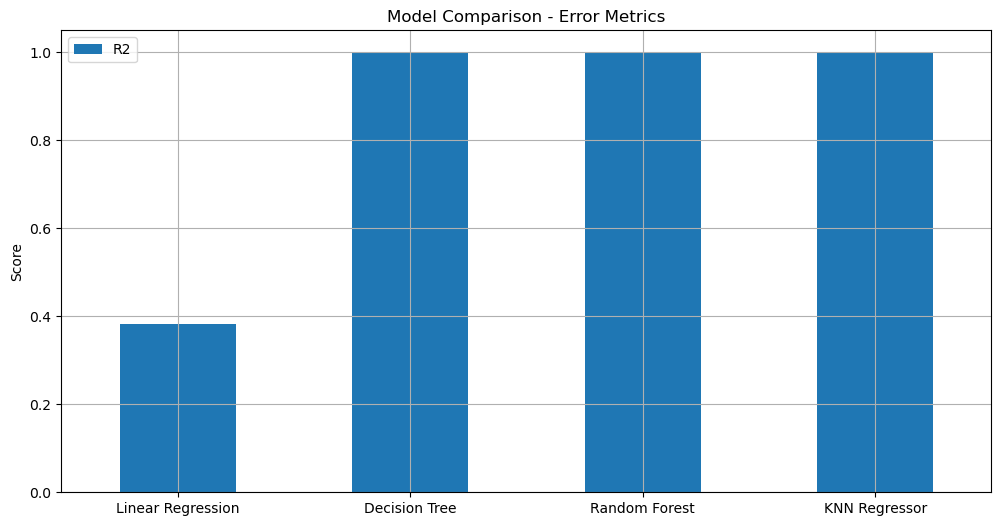

In [41]:
#Plot Evaluation Metrics
import matplotlib.pyplot as plt

# Convert results to DataFrame
results_df = pd.DataFrame(result).T  # transpose so models are rows

# Plot bar charts
results_df[['MAE', 'MSE', 'RMSE', 'R2']].plot(kind='bar', figsize=(12,6))
plt.title("Model Comparison - Error Metrics")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

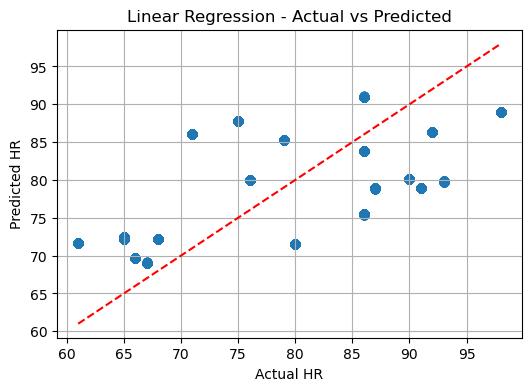

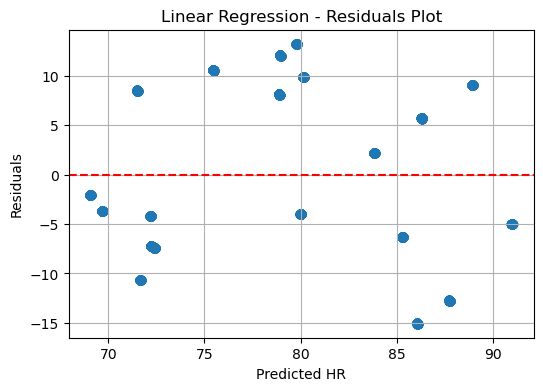

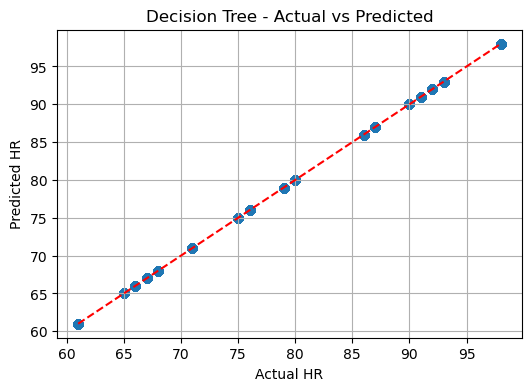

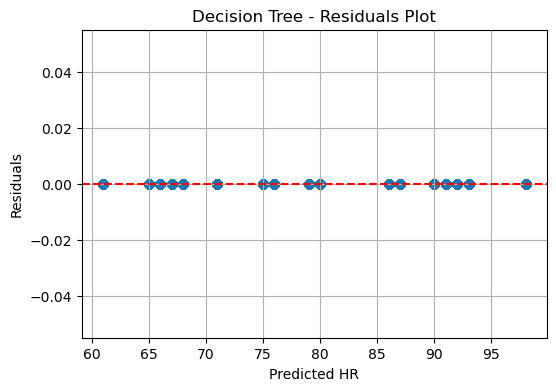

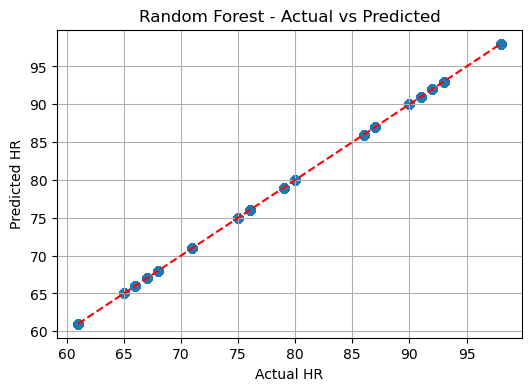

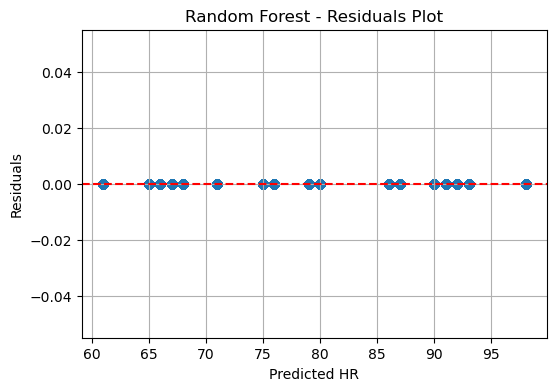

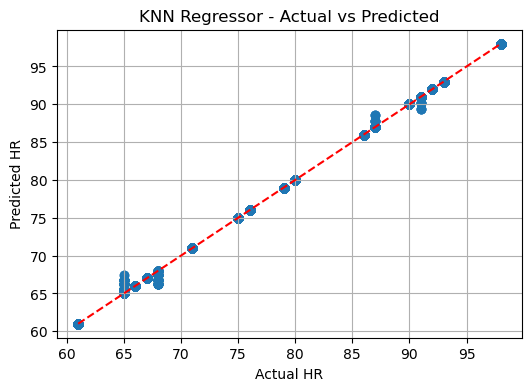

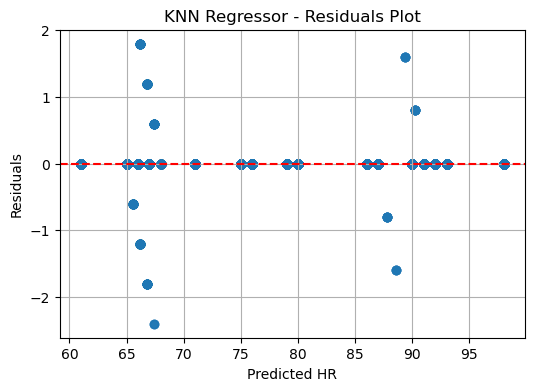

In [43]:
for name in models:
    y_pred = prediction[name]

    # Actual vs Predicted
    plt.figure(figsize=(6, 4))
    plt.scatter(y_test, y_pred, alpha=0.7)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel("Actual HR")
    plt.ylabel("Predicted HR")
    plt.title(f"{name} - Actual vs Predicted")
    plt.grid(True)
    plt.show()

    # Residuals Plot
    residuals = y_test - y_pred
    plt.figure(figsize=(6, 4))
    plt.scatter(y_pred, residuals, alpha=0.7)
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel("Predicted HR")
    plt.ylabel("Residuals")
    plt.title(f"{name} - Residuals Plot")
    plt.grid(True)
    plt.show()